In [9]:
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
DATAFRAMES = os.path.join("..", "..", "results", "dataframes", "")
FIGURES = os.path.join("..", "..", "results", "figures", "")

# Data preprocessing

In [11]:
df = pd.concat([
    pd.read_csv(os.path.join(DATAFRAMES, "dataframe_arxiv.csv")),
    pd.read_csv(os.path.join(DATAFRAMES, "dataframe_celegans.csv")),
    pd.read_csv(os.path.join(DATAFRAMES, "dataframe_drosophila.csv")),
    pd.read_csv(os.path.join(DATAFRAMES, "dataframe_london.csv")),
])
print(df.columns)

Index(['system', 'layers', 'theta', 'embedding', 'accuracy', 'auroc', 'pr',
       'intercept', 'coef_distances', 'coef_degrees'],
      dtype='object')


In [12]:
df = df.melt(
    id_vars=["system", "layers", "embedding", "theta", "intercept", "coef_distances", "coef_degrees"],
    value_vars=["accuracy", "auroc", "pr"],
    var_name="perftype", value_name="perfval"
).melt(
    id_vars=["system", "layers", "embedding", "theta", "perftype", "perfval"],
    value_vars=["intercept", "coef_distances", "coef_degrees"],
    var_name="featuretype",
    value_name="featureval"
)

# Figures

## Faceted

In [13]:
df_ = df.query("perftype == 'auroc' & embedding != 'Isomap' & system != 'london'")
df_["layers"] = df_["layers"].apply(lambda row: {
    "2-6": "1-2",
    "2-7": "1-3",
    "6-7": "2-3"
}.get(row, row))

<Figure size 640x480 with 0 Axes>

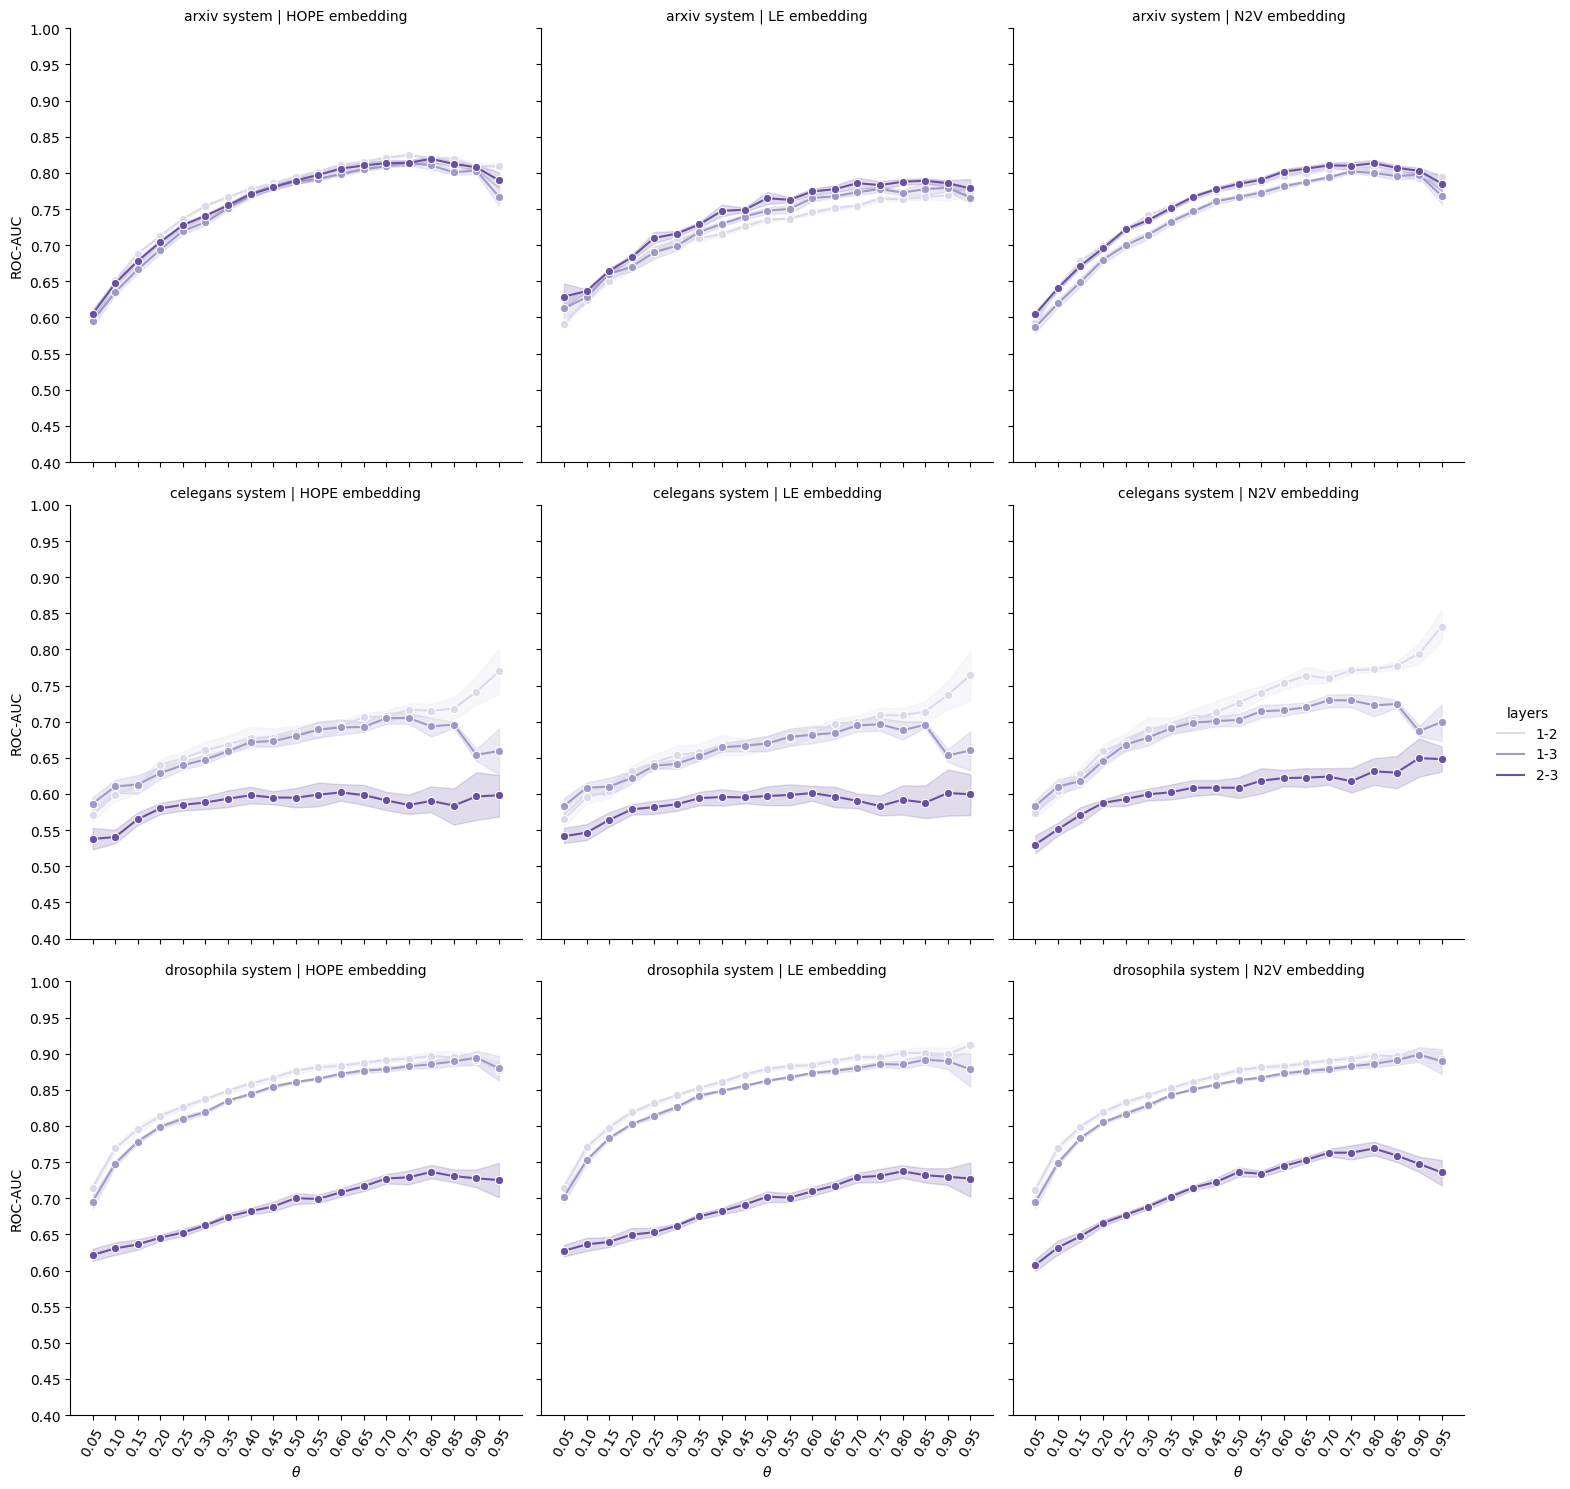

In [14]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="perfval",
    row="system", col="embedding",
    hue="layers", palette="Purples",
    marker="o",
)

# Adjust axes
g.set_axis_labels(r'$\theta$', 'ROC-AUC')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique()),
    ylim=(0.4, 1), yticks=np.linspace(0.4, 1.0, 13))
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
g.set_titles(col_template="{col_name} embedding", row_template="{row_name} system")

# Adjust figure
g.tight_layout()

# Save to disk
g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")

## Coefficients

<Figure size 640x480 with 0 Axes>

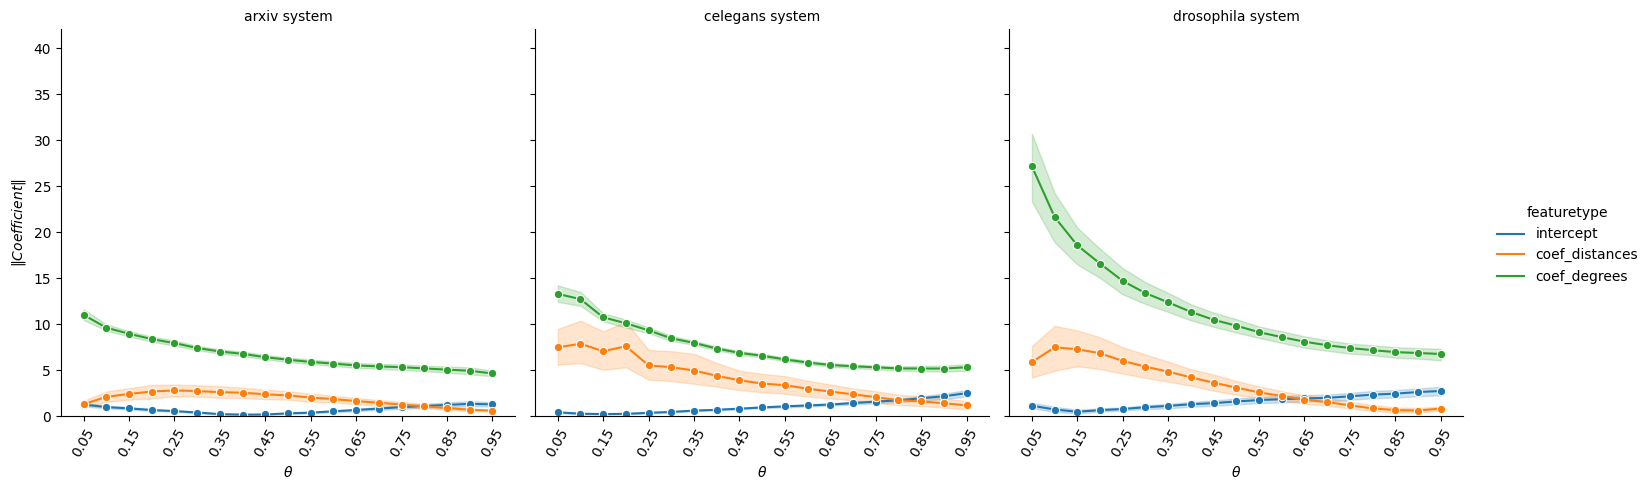

In [15]:
# Instantiate figure
plt.figure()

df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="featureval",
    col="system",
    hue="featuretype",
    marker="o",
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique())[::2],
    ylim=(0, df_["featureval"].max()),
)
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
g.set_titles(col_template="{col_name} system")

# Adjust figure
g.tight_layout()

# # Save to disk
# # g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")